# Task description and decomposition

**Project objective:**

● Examine existing user engagement data to identify patterns and trends.\
● Formulate and justify the numerical values (X, Y, Z) for each badge based on your data
analysis

**Badges and Proposed Criteria:**

● Event Planner: At least X events with Y participants in Z weeks. \
● Conversation Starter: At least X posts with Y replies in Z weeks. \
● Philanthropist: At least X items gifted on the marketplace in Z weeks.\
● Helping Hand: At least X thankyou messages received in Z weeks. \
● Local Guide: At least X places recommended in Z weeks.


**Time Frames for Analysis:**

● 4 weeks \
● 6 weeks \
● 8 weeks \
● 12 weeks


**Project structure:** \
● Creation of the dataset and data pre-processing \
● Exploratory data analysis & engagement metrics \
● Badge criteria \
● Conclusions

# Data pre-processing

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

df = pd.read_csv('tech_challenge_nebenan.csv')
df.head()

,USER_ID,LAST_X_WEEKS,POSTS_CREATED,REPLIES_RECEIVED,THANKYOUS_RECEIVED,EVENTS_CREATED,EVENT_PARTICIPANTS,ITEMS_GIFTED,PLACES_RECOMMENDED
0,1,4,1.0,0.0,6.0,NaN,NaN,NaN,NaN
1,1,6,1.0,0.0,6.0,NaN,NaN,NaN,NaN
2,1,8,1.0,0.0,6.0,NaN,NaN,NaN,NaN
3,1,12,2.0,0.0,6.0,NaN,NaN,NaN,NaN
4,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# checking for missing values and duplicates

df.isna().sum(), df.duplicated().sum()

(USER_ID                   0
 LAST_X_WEEKS              0
 POSTS_CREATED         43899
 REPLIES_RECEIVED      43899
 THANKYOUS_RECEIVED    43899
 EVENTS_CREATED        74696
 EVENT_PARTICIPANTS    74696
 ITEMS_GIFTED          66776
 PLACES_RECOMMENDED    72873
 dtype: int64,
 0)

The only columns without missing values are USER_ID and LAST_X_WEEKS, the others have missing values, which is logical, since not all users engage in every kind of activity. There are no full duplicates in the dataset.

It also makes sense to replace the missing values with 0 in the context of this project, as missing values highly likely represent that the user did not engage in the activity. It would still be desirable to confirm that with the person who provided the dataset.

In [4]:
# general information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USER_ID             80000 non-null  int64  
 1   LAST_X_WEEKS        80000 non-null  int64  
 2   POSTS_CREATED       36101 non-null  float64
 3   REPLIES_RECEIVED    36101 non-null  float64
 4   THANKYOUS_RECEIVED  36101 non-null  float64
 5   EVENTS_CREATED      5304 non-null   float64
 6   EVENT_PARTICIPANTS  5304 non-null   float64
 7   ITEMS_GIFTED        13224 non-null  float64
 8   PLACES_RECOMMENDED  7127 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 5.5 MB


The dataset contains 80000 entries, the data types are correct numeric values.

In [5]:
df.describe()

,USER_ID,LAST_X_WEEKS,POSTS_CREATED,REPLIES_RECEIVED,THANKYOUS_RECEIVED,EVENTS_CREATED,EVENT_PARTICIPANTS,ITEMS_GIFTED,PLACES_RECOMMENDED
count,80000.000000,80000.000000,36101.000000,36101.000000,36101.000000,5304.000000,5304.000000,13224.000000,7127.000000
mean,10000.500000,7.500000,1.560455,2.804438,1.729869,1.747172,2.990196,1.832350,2.558861
std,5773.538769,2.958058,5.300670,5.023577,5.613324,2.073147,3.954328,2.153866,4.221170
min,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5000.750000,5.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,10000.500000,7.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
75%,15000.250000,9.000000,2.000000,4.000000,1.000000,2.000000,3.000000,2.000000,2.000000
max,20000.000000,12.000000,698.000000,139.000000,194.000000,36.000000,58.000000,58.000000,155.000000


In [6]:
# checking the number of unique users

df['USER_ID'].nunique()

20000

Based on the dataset description, the following observations can be made:

The dataset covers 20,000 unique users. Users generally create a small number of posts, with a median of 1 and a mean of 1.56. However, there's a maximum of 698 posts by a user, indicating either that some users are extremely active, or that there might be random outliers in the dataset.

The average number of replies received is 2.8, with a median of 1, suggesting a skewed distribution.

Similar to replies, thank-yous tend to be few, with many users receiving none.

As for EVENTS_CREATED, EVENT_PARTICIPANTS, ITEMS_GIFTED, PLACES_RECOMMENDED: These activities are less common among users, as indicated by the high number of missing values and lower averages.

In [7]:
# setting the column names to lowercase

df.columns = df.columns.str.lower()
df

,user_id,last_x_weeks,posts_created,replies_received,thankyous_received,events_created,event_participants,items_gifted,places_recommended
0,1,4,1.0,0.0,6.0,NaN,NaN,NaN,NaN
1,1,6,1.0,0.0,6.0,NaN,NaN,NaN,NaN
2,1,8,1.0,0.0,6.0,NaN,NaN,NaN,NaN
3,1,12,2.0,0.0,6.0,NaN,NaN,NaN,NaN
4,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
79995,19999,12,NaN,NaN,NaN,NaN,NaN,NaN,1.0
79996,20000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79997,20000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79998,20000,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# filling in the missing values with 0
df = df.fillna(0)

# EDA

In [9]:
# list of engagement metrics

engagement_metrics = ['posts_created', 'replies_received', 'thankyous_received', \
                      'events_created', 'event_participants', 'items_gifted', 'places_recommended']

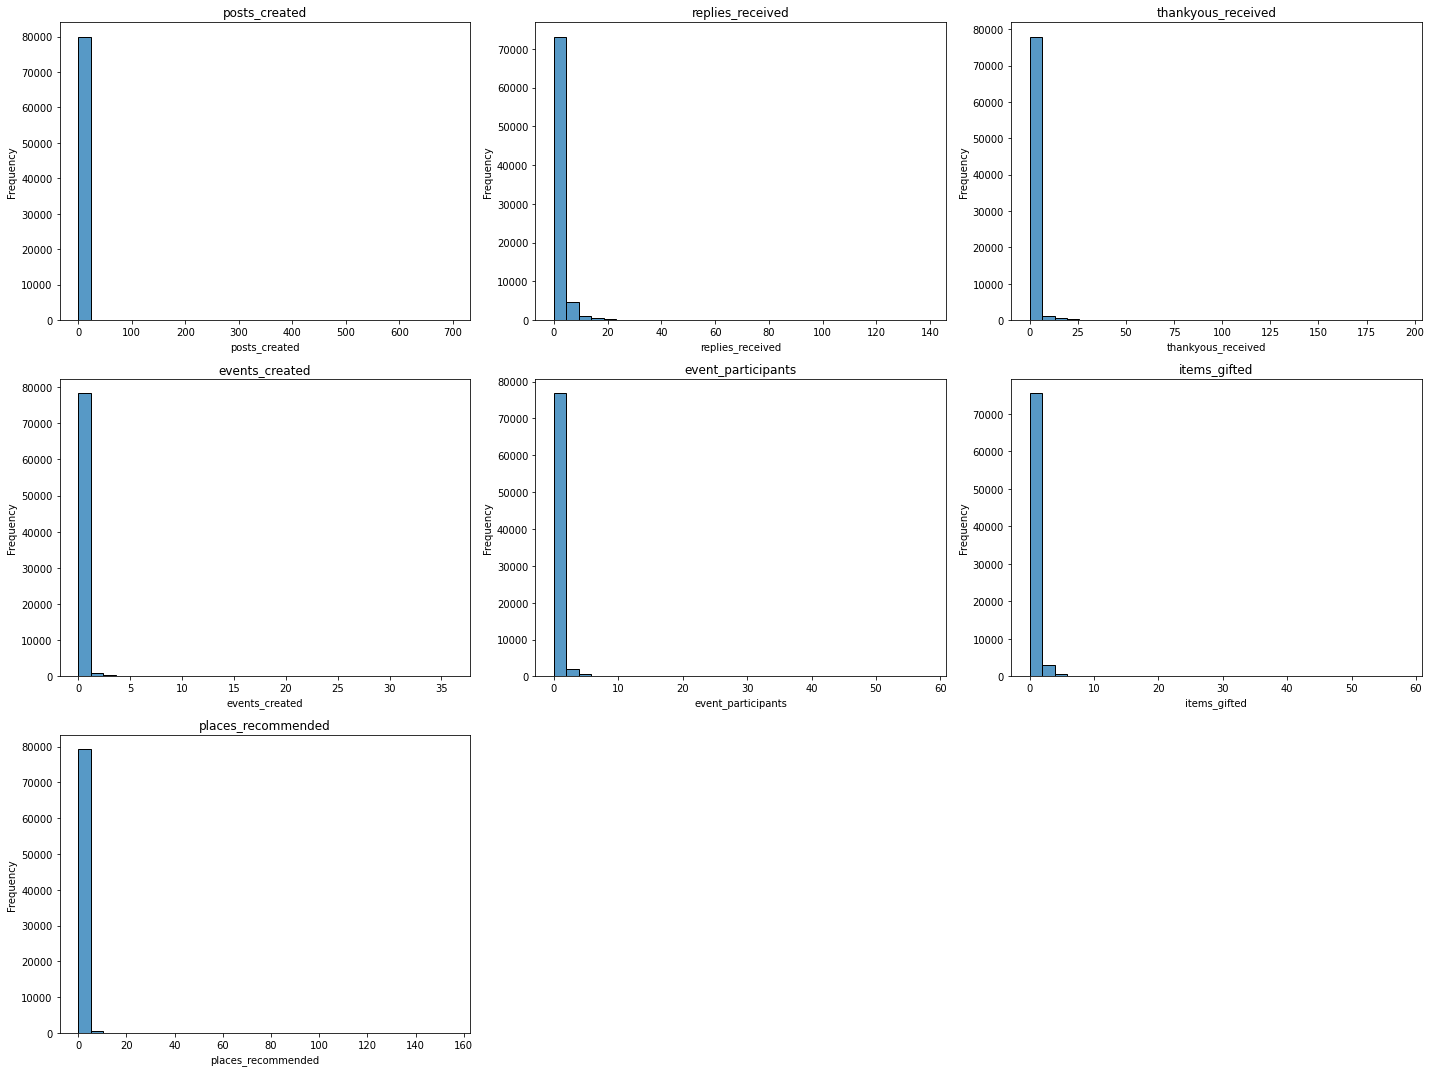

In [10]:
# engagement metrics distribution

plt.figure(figsize=(20, 15))

for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[metric].dropna(), bins=30)
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

All metrics have similar distribution and show that the majority of the user base conduct only a few actions of every type, with a small proportion of highly engaged users for every type of activity. 

In [11]:
# grouping user actions by activity timeframes  

periods_grouped = (
    df.groupby('last_x_weeks')[['posts_created', 'replies_received', 'thankyous_received', 'events_created', \
                                'event_participants', 'items_gifted', 'places_recommended']]
    .sum()
    .reset_index())
periods_grouped

,last_x_weeks,posts_created,replies_received,thankyous_received,events_created,event_participants,items_gifted,places_recommended
0,4,7169.0,12400.0,8053.0,1309.0,2259.0,3283.0,2795.0
1,6,11023.0,19720.0,12158.0,1842.0,3149.0,4915.0,3899.0
2,8,14899.0,26656.0,16488.0,2443.0,4172.0,6613.0,4736.0
3,12,23243.0,42467.0,25751.0,3673.0,6280.0,9420.0,6807.0


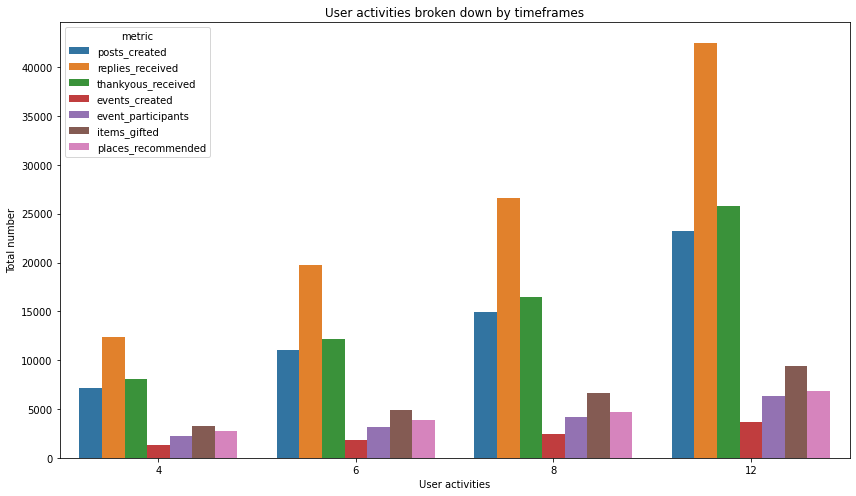

In [12]:
# preparing grouped dataframe for visualization
periods_grouped_melted = periods_grouped.melt(id_vars='last_x_weeks', var_name='metric', value_name='total_number')
periods_grouped_melted

# visualizing metrics by timeframes
plt.figure(figsize=(12, 7))
sns.barplot(x='last_x_weeks', y='total_number', hue='metric', data=periods_grouped_melted)
plt.xlabel('User activities')
plt.ylabel('Total number')
plt.title('User activities broken down by timeframes')
plt.tight_layout()
plt.show()

Across all the given timeframes creating posts and replying to them are 2 most popular kinds of activities. \
"Thankyous_received" is on the 3rd place. \
Creating events or participating in them is much less common among the users. \
Finally, 'items_gifted' and 'places_recommended' are the least common activities among the users. 

All metrics show cumulative growth over time, with a particularly steep increase for 'replies_received' from the 8-week to the 12-week timeframe.

In [13]:
# calculating the increase in engagement metrics between periods

cols_list = ['posts_created', 'replies_received', 'thankyous_received', 
             'events_created', 'event_participants', 'items_gifted', 'places_recommended']

cols_diff = periods_grouped[cols_list].diff()

df_grouped_diff = periods_grouped[['last_x_weeks']].join(cols_diff)

df_grouped_diff

,last_x_weeks,posts_created,replies_received,thankyous_received,events_created,event_participants,items_gifted,places_recommended
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,3854.0,7320.0,4105.0,533.0,890.0,1632.0,1104.0
2,8,3876.0,6936.0,4330.0,601.0,1023.0,1698.0,837.0
3,12,8344.0,15811.0,9263.0,1230.0,2108.0,2807.0,2071.0


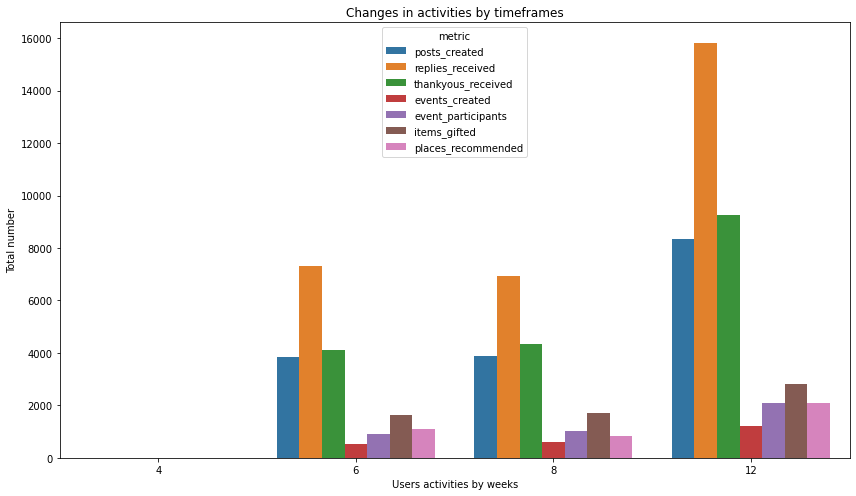

In [14]:
# preparing grouped dataframe for visualization
df_grouped_diff_melted = df_grouped_diff.melt(id_vars='last_x_weeks', var_name='metric', value_name='total_number')

# visualizing changes by timeframes
plt.figure(figsize=(12, 7))
sns.barplot(x='last_x_weeks', y='total_number', hue='metric', data=df_grouped_diff_melted)
plt.xlabel('Users activities by weeks')
plt.ylabel('Total number')
plt.title('Changes in activities by timeframes')
plt.tight_layout()
plt.show()

# Criteria for awarding the badges


Two different scenarios for awarding badges can be suggested:

1. If users see what badges they can earn and criteria for earning them, it's possible to make the criteria slightly more challenging to motivate the users to be more active and strive to achieve the badge.

2. If users can't see what badges they can earn, then the criteria should be less challenging so that more users can get a reward.

Based on this logic, we will check the the following for each metric under consideration: median, 75th percentile, 80th and 90th percentile, broken down by timeframes. Then, based on those values, criteria for each badge for both scenarios will be formulated.

## "Event Planner" badge

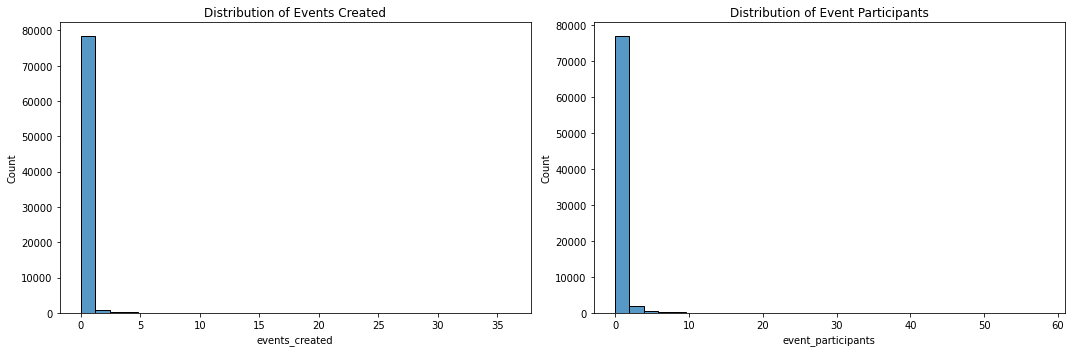

In [15]:
# Filtering relevant columns
event_data = df[['last_x_weeks', 'events_created', 'event_participants']]

# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(event_data['events_created'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of Events Created')
sns.histplot(event_data['event_participants'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Event Participants')
plt.tight_layout()
plt.show()

In [16]:
df.groupby('last_x_weeks')[['events_created', \
                            'event_participants']].describe(percentiles=[0.5, 0.6, 0.75, 0.8, 0.9])

events_created                                                   \
                      count     mean       std  min  50%  60%  75%  80%  90%   
last_x_weeks                                                                   
4                   20000.0  0.06545  0.467843  0.0  0.0  0.0  0.0  0.0  0.0   
6                   20000.0  0.09210  0.580805  0.0  0.0  0.0  0.0  0.0  0.0   
8                   20000.0  0.12215  0.708134  0.0  0.0  0.0  0.0  0.0  0.0   
12                  20000.0  0.18365  0.911133  0.0  0.0  0.0  0.0  0.0  0.0   

                   event_participants                                         \
               max              count     mean       std  min  50%  60%  75%   
last_x_weeks                                                                   
4             32.0            20000.0  0.11295  0.894948  0.0  0.0  0.0  0.0   
6             36.0            20000.0  0.15745  1.080101  0.0  0.0  0.0  0.0   
8             36.0            20000.0  0.20860  1.282953  0.0  0.0  0.0  0.0   
12            36.0            20000.0  0.31400  1.650588  0.0  0.0  0.0  0.0   

                              
              80%  90%   max  
last_x_weeks                  
4             0.0  0.0  57.0  
6             0.0  0.0  57.0  
8             0.0  0.0  57.0  
12            0.0  0.0  58.0

The following criteria can be suggested for the "Event Planner", if we want the badge to be more achievable:

- At least 2 events with 3 participants in 4 weeks across all the presented timeframes (4, 6, 8, 12 weeks).

For the more challenging version:

- At least 3 events with 4 participants in 4 weeks.
– At least 3 events with 5 participants in 6, 8 and 12 weeks.

## "Conversation Starter" Badge

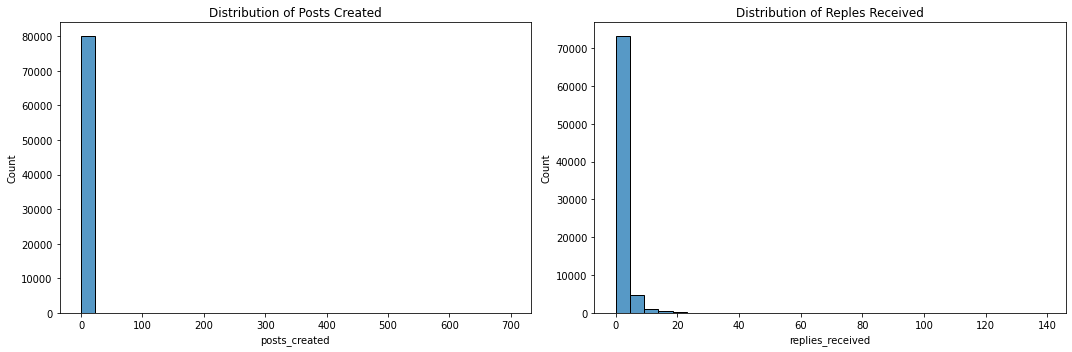

In [17]:
# Filtering relevant columns
conversations_data = df[['last_x_weeks', 'posts_created', 'replies_received']]

# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(conversations_data['posts_created'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of Posts Created')
sns.histplot(conversations_data['replies_received'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Reples Received')
plt.tight_layout()
plt.show()

In [18]:
df.groupby('last_x_weeks')[['posts_created', \
                            'replies_received']].describe(percentiles=[0.5, 0.6, 0.75, 0.8, 0.9])

posts_created                                                   \
                     count     mean       std  min  50%  60%  75%  80%  90%   
last_x_weeks                                                                  
4                  20000.0  0.35845  2.185430  0.0  0.0  0.0  1.0  1.0  1.0   
6                  20000.0  0.55115  2.820209  0.0  0.0  0.0  1.0  1.0  1.0   
8                  20000.0  0.74495  3.614879  0.0  0.0  1.0  1.0  1.0  2.0   
12                 20000.0  1.16215  5.194074  0.0  1.0  1.0  1.0  2.0  2.0   

                    replies_received                                         \
                max            count     mean       std  min  50%  60%  75%   
last_x_weeks                                                                  
4             290.0          20000.0  0.62000  2.235207  0.0  0.0  0.0  0.0   
6             373.0          20000.0  0.98600  2.993201  0.0  0.0  0.0  0.0   
8             482.0          20000.0  1.33280  3.733087  0.0  0.0  0.0  1.0   
12            698.0          20000.0  2.12335  4.921153  0.0  0.0  1.0  3.0   

                               
              80%  90%    max  
last_x_weeks                   
4             0.0  2.0   56.0  
6             1.0  3.0   71.0  
8             2.0  4.0  110.0  
12            3.0  6.0  139.0

More achievable scenario:
- At least 2 posts with 3 replies in 4 and 6 weeks
- At least 2 posts with 4 replies in 8 and 12 weeks

More challenging scenario:
- At least 2 posts with 4 replies in 4, 6 and 8 weeks
- At least 2 posts with 5 replies in 12 weeks

## "Philanthropist" Badge

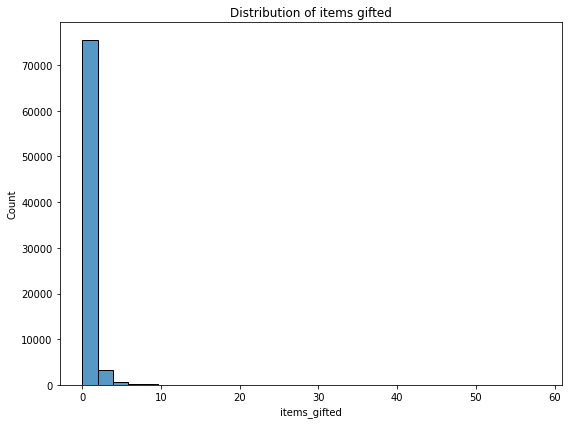

In [19]:
# Filtering relevant columns
gifts_data = df[['last_x_weeks', 'items_gifted']]

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(gifts_data['items_gifted'], bins=30)
plt.title('Distribution of items gifted')
plt.tight_layout()
plt.show()

In [20]:
df.groupby('last_x_weeks')['items_gifted'].describe(percentiles=[0.5, 0.6, 0.75, 0.8, 0.9])

,count,mean,std,min,50%,60%,75%,80%,90%,max
last_x_weeks,,,,,,,,,,
4,20000.0,0.16415,0.769503,0.0,0.0,0.0,0.0,0.0,0.0,44.0
6,20000.0,0.24575,0.954307,0.0,0.0,0.0,0.0,0.0,1.0,49.0
8,20000.0,0.33065,1.152470,0.0,0.0,0.0,0.0,0.0,1.0,55.0
12,20000.0,0.47100,1.427537,0.0,0.0,0.0,0.0,1.0,1.0,58.0


More achievable scenario:
- At least 2 items gifted on the marketplace in 4, 6, 8 and 12 weeks

More challenging scenario:
- At least 3 items gifted on the marketplace in 4, 6, 8 weeks
- At least 4 items gifted on the marketplace in 12 weeks

## "Helping Hand" Badge

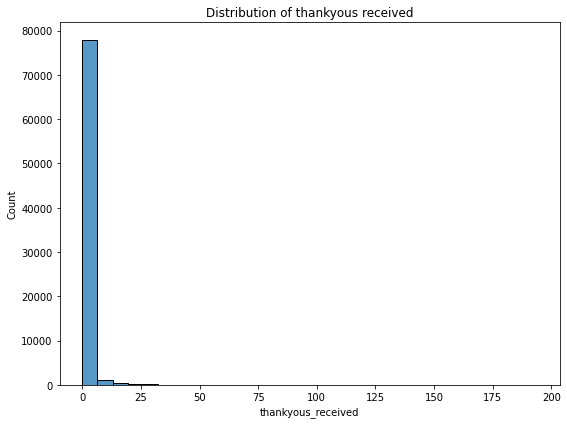

In [21]:
# Filtering relevant columns
gifts_data = df[['last_x_weeks', 'thankyous_received']]

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(gifts_data['thankyous_received'], bins=30)
plt.title('Distribution of thankyous received')
plt.tight_layout()
plt.show()

In [22]:
df.groupby('last_x_weeks')['thankyous_received'].describe(percentiles=[0.5, 0.6, 0.75, 0.8, 0.9])

,count,mean,std,min,50%,60%,75%,80%,90%,max
last_x_weeks,,,,,,,,,,
4,20000.0,0.40265,2.606677,0.0,0.0,0.0,0.0,0.0,1.0,115.0
6,20000.0,0.60790,3.246611,0.0,0.0,0.0,0.0,0.0,1.0,115.0
8,20000.0,0.82440,3.914720,0.0,0.0,0.0,0.0,1.0,2.0,139.0
12,20000.0,1.28755,5.172002,0.0,0.0,0.0,1.0,1.0,3.0,194.0


More achievable scenario:
-  At least 2 thankyou messages received across all weeks

More challenging scenario:
- At least 3 thankyou messages received in 4 and 6, weeks
- At least 4 thankyou messages received in 8 and 12 weeks

## "Local Guide" Badge

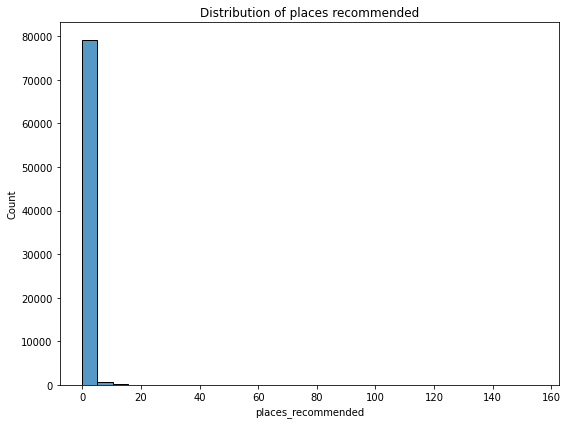

In [23]:
# Filtering relevant columns
gifts_data = df[['last_x_weeks', 'places_recommended']]

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(gifts_data['places_recommended'], bins=30)
plt.title('Distribution of places recommended')
plt.tight_layout()
plt.show()

In [24]:
df.groupby('last_x_weeks')['places_recommended'].describe(percentiles=[0.5, 0.6, 0.75, 0.8, 0.9])

,count,mean,std,min,50%,60%,75%,80%,90%,max
last_x_weeks,,,,,,,,,,
4,20000.0,0.13975,1.118026,0.0,0.0,0.0,0.0,0.0,0.0,72.0
6,20000.0,0.19495,1.274059,0.0,0.0,0.0,0.0,0.0,0.0,72.0
8,20000.0,0.23680,1.377723,0.0,0.0,0.0,0.0,0.0,0.0,72.0
12,20000.0,0.34035,1.918749,0.0,0.0,0.0,0.0,0.0,1.0,155.0


More achievable scenario:
-  At least 2 places recommended across all weeks.

More challenging scenario:
-  At least 3 places recommended across all weeks.